revision information:
- Oct. 1st. 2018 [first version]
- Oct. 29th. 2018

#  The basic of voxel and volume wise approaches on fMRI data analysis

- both spatial and temporal features of the data is important on fMRI data analysis.
- In this learning materials, We will learn how to get the indices (aka. Coordinates) of the data you are interested in, specifically from the data with numpy.array datatype, and also how to process the function on it followed by extracting the data.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Learning objectives

After study of the assigned learning materials, the student will know:
1. how to perform voxel-wise approach for analyzing temporal feature.
2. how to perform volume-wise approach for analyzing spatial feature.

Please complete the assignment using the sample data that provided with previous material.

### Numpy methods to get indices from the data

- `np.where(condition[, x, y])` : Return elements, either from x or y, depending on condition.
- `np.argmax(a[, axis]) or np.nanargmax(a[, axis])` : Returns the indices of the maximum values along an axis (ignoring NaN value).
- `np.argmin(a[, axis]) or np.nanargmin(a[, axis])` : Returns the indices of the minimum values along an axis (ignoring NaN value).
- `np.argsort(a[, axis, kind, order])` : Returns the indices that would sort an array.
- `np.nonzero(a)` : Return the indices of the elements that are non-zero.

reference: https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.sort.html

#### Examples

In [33]:
# define data shape for creating 4D data
data_shape = [10, 10, 10, 100]
# create random data ranged between 0 to 10
np.random.seed(0)
sample_data = np.random.randint(0, 10, data_shape)
# create 10 points of random indices (coordinate) for 3D space
# the coordinates need to be created as tuple datatype
indices = tuple(np.random.randint(0, 10, [3, 10]))

In [35]:
indices

(array([2, 8, 7, 0, 4, 3, 1, 3, 3, 6]),
 array([6, 3, 5, 2, 5, 5, 3, 8, 4, 5]),
 array([8, 7, 2, 9, 2, 1, 2, 9, 3, 1]))

In [36]:
sample_data[indices].shape

(10, 100)

In [37]:
# set all values as 100 in the indexed data
sample_data[indices] = 100

In [38]:
# Calculate mean value of sample_data along last axis
mean_val = sample_data.mean(-1)
mean_val.shape

(10, 10, 10)

In [39]:
returned_indices = np.where(mean_val == 100.0)
returned_indices

(array([0, 1, 2, 3, 3, 3, 4, 6, 7, 8]),
 array([2, 3, 6, 4, 5, 8, 5, 5, 5, 3]),
 array([9, 2, 8, 3, 1, 9, 2, 1, 2, 7]))

In [41]:
indices

(array([2, 8, 7, 0, 4, 3, 1, 3, 3, 6]),
 array([6, 3, 5, 2, 5, 5, 3, 8, 4, 5]),
 array([8, 7, 2, 9, 2, 1, 2, 9, 3, 1]))

In [48]:
sorted_index = np.argsort(indices[0])

In [52]:
for i in returned_indices:
    print(i)

[0 1 2 3 3 3 4 6 7 8]
[2 3 6 4 5 8 5 5 5 3]
[9 2 8 3 1 9 2 1 2 7]


In [51]:
for i in indices:
    print(i[sorted_index])

[0 1 2 3 3 3 4 6 7 8]
[2 3 6 5 8 4 5 5 5 3]
[9 2 8 1 9 3 2 1 2 7]


In [50]:
indices

(array([2, 8, 7, 0, 4, 3, 1, 3, 3, 6]),
 array([6, 3, 5, 2, 5, 5, 3, 8, 4, 5]),
 array([8, 7, 2, 9, 2, 1, 2, 9, 3, 1]))

### Voxel-wise approach

- To perform the voxel-wise approach, without understanding of advance numpy indexging introduces on above session, we need to apply the same function along with all voxels iteratively.
- To do this, you have to learn how to perform iteration using 'for loop'.
- Below code shows how to check if the object is iterable or not.

In [53]:
from collections import Iterable
iterable_object = [1, 2, 3]
non_iterable_object = 1

In [54]:
isinstance(iterable_object, Iterable)

True

In [55]:
isinstance(non_iterable_object, Iterable)

False

- Now let's use our dataset

In [56]:
import nibabel as nib
img = nib.load('../Session02-Handling_fMRI_timecourse_data/Data/BOLD-rsfMRI_WistarRat_female_P80.nii.gz')

In [57]:
isinstance(img, Iterable)

False

- The image object is the container for data and meta-information. so its not iterable.
- Since we are interested in looking data, let's parse the data object from the image object, and check if it is iterable and what the type of this object is.

In [58]:
data = img.get_data()
isinstance(data, Iterable)

True

In [59]:
type(data)

numpy.ndarray

- The data is numpy N-dimensional array, let's see how 'for loop' works on this object.

In [60]:
data.shape

(72, 72, 32, 900)

In [62]:
i = 0
for j, d in enumerate(data): # enumerate function created indices for each iterating component.
    print('index: {}, datashape: {}'.format(j, d.shape))
    i += 1  # same as i = i + 1
print(i)

index: 0, datashape: (72, 32, 900)
index: 1, datashape: (72, 32, 900)
index: 2, datashape: (72, 32, 900)
index: 3, datashape: (72, 32, 900)
index: 4, datashape: (72, 32, 900)
index: 5, datashape: (72, 32, 900)
index: 6, datashape: (72, 32, 900)
index: 7, datashape: (72, 32, 900)
index: 8, datashape: (72, 32, 900)
index: 9, datashape: (72, 32, 900)
index: 10, datashape: (72, 32, 900)
index: 11, datashape: (72, 32, 900)
index: 12, datashape: (72, 32, 900)
index: 13, datashape: (72, 32, 900)
index: 14, datashape: (72, 32, 900)
index: 15, datashape: (72, 32, 900)
index: 16, datashape: (72, 32, 900)
index: 17, datashape: (72, 32, 900)
index: 18, datashape: (72, 32, 900)
index: 19, datashape: (72, 32, 900)
index: 20, datashape: (72, 32, 900)
index: 21, datashape: (72, 32, 900)
index: 22, datashape: (72, 32, 900)
index: 23, datashape: (72, 32, 900)
index: 24, datashape: (72, 32, 900)
index: 25, datashape: (72, 32, 900)
index: 26, datashape: (72, 32, 900)
index: 27, datashape: (72, 32, 900)
in

- As you can see above, 'for loop' is performing iteration though first axis on numpy array.
    - The first to third axes (72x72x32, 3D volume) contains spatial information on certain time-point, and
    - the fourth axis (t = 900) contains temporal information for each volume.
- To perform voxel-wise approach, we need to iterate the function though first 3 axes.
    - The below code will present most basic way to achieve this in python.

In [65]:
data.shape

(72, 72, 32, 900)

In [69]:
from scipy.stats import pearsonr

# Create 900 random timepoint (please replace this to average timepoint of your M1 mask)
random_time_course = np.random.ranf(900)
output = np.zeros(img.shape[:3])

# iterating i * j * k
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        for k in range(data.shape[2]):
            output[i, j, k] = pearsonr(random_time_course, data[i, j, k, :])[0]

In [70]:
output.shape

(72, 72, 32)

- Below code will show more pythonic way to do the same thing with numpy indexing.

In [74]:
output = np.zeros(data.shape[:3])
indices = np.transpose(np.nonzero(data.mean(-1)[:,:,:]))
print(np.asarray(np.nonzero(data.mean(-1)[:,:,:])).shape)
print(np.asarray(indices).shape)

(3, 29949)
(29949, 3)


In [76]:
data.shape

(72, 72, 32, 900)

In [77]:
print(72*72*32)

165888


In [75]:
for i, j, k in indices:
    output[i, j, k] = pearsonr(random_time_course, data[i, j, k, :])[0]

- Supplimental function for plotting brain images

In [81]:
def plot_brain(data, vmin, vmax):
    data = np.nan_to_num(data)
    fig, axes = plt.subplots(4, 8, figsize=(8, 4), dpi=100)
    for i, a in enumerate(axes.flatten()):
        a.imshow(data[:,:,i].T, origin='lower', cmap='RdBu', vmin=vmin, vmax=vmax)
        a.get_xaxis().set_visible(False)
        a.get_yaxis().set_visible(False)
    plt.tight_layout()

In [82]:
print('min: {}, max: {}'.format(output.min(), output.max()))

min: -0.141820531876, max: 0.123264797947


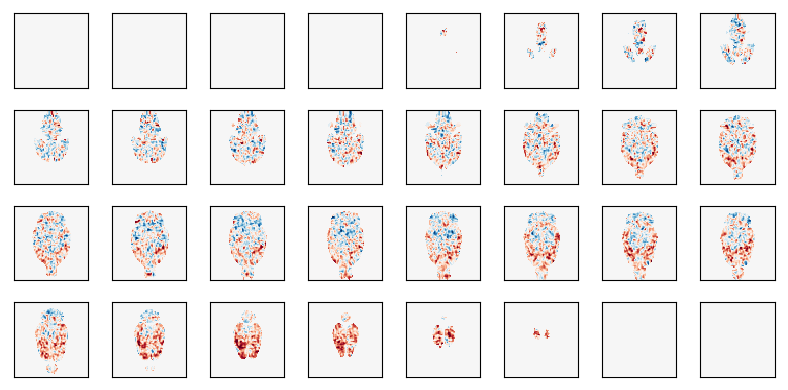

In [83]:
vmin = -0.1
vmax = 0.1
plot_brain(output, vmin, vmax)

### Volume-wise approach
- To perform the volume-wise approach, we need to apply the same function along the time axis iteratively.

In [24]:
data.shape

(72, 72, 32, 900)

- To perform comparison on the spatial feature, it need to be aligned on one axis

In [84]:
x, y, z, t = data.shape
flatten_data = data.reshape([x*y*z, t])
flatten_data.shape

(165888, 900)

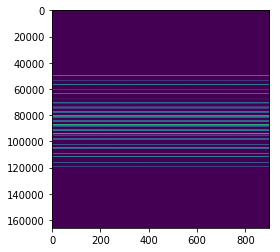

In [91]:
# Plotting voxel x time plot along all voxel
imshow(flatten_data, aspect=(t / float(x*y*z)))

In [118]:
indices = np.nonzero(flatten_data.mean(-1))

In [137]:
# Get indices the voxel only has data
indices = np.nonzero(flatten_data.mean(-1))
norm_brain_data = np.zeros([indices[0].shape[0], flatten_data.shape[-1]])

# Below code perform standard normalization on only the voxel has data
for i, j in enumerate(indices[0]):
    our_data = flatten_data[j, :]
    mean_val = our_data.mean()
    std_val = our_data.std()
    norm_brain_data[i] = (our_data - mean_val) / std_val

In [145]:
# The reason we use complex indexing to get indexing shape
# np.nonzero returns tuple, even its one components, and tuple does not provide shape method.
# Since we know the size of tuple will be 1, we indexing first axis (0) and get the size of it
print("type of indices: {}, size of indices[0]: {}".format(type(indices), indices[0].size))

type of indices: <type 'tuple'>, size of indices[0]: 29949


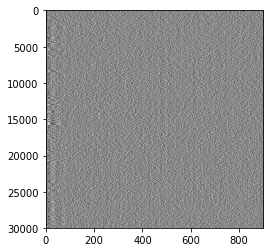

In [148]:
# Check the size of output data
n_voxel, n_time = norm_brain_data.shape
# Below code will plot 
imshow(norm_brain_data, aspect=(n_time/float(n_voxel)), cmap='gray')

- Let's calculate the pearson r between the first volume and each time point.

In [26]:
output = np.zeros(t)
for i in range(t):
    output[i] = pearsonr(flatten_data[:, 0], flatten_data[:, i])[0]

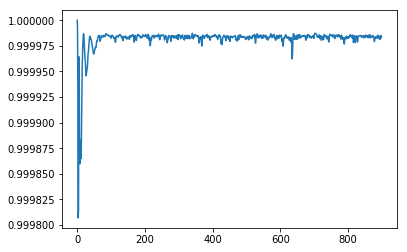

In [27]:
plot(output)

- or you can also uses the index as below

In [28]:
indices = np.nonzero(data[:,:,:,0])
masked_data = data[indices]

In [29]:
masked_data.shape # Now it only contains the voxel that has value

(29949, 900)

In [30]:
output = np.zeros(t)
for i in range(t):
    output[i] = pearsonr(masked_data[:, 0], masked_data[:, i])[0]

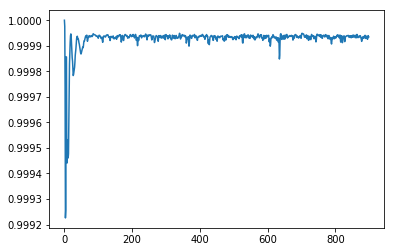

In [31]:
plot(output)

### Assignments
1. Extract time-course from the mask images you drawn for last assignment (M1 and Striatum) and calculate voxel-wise Pearson's R.

```
(tip how to extract averages timecourse data from your ROI (e.g. M1))
m1_indices = np.nonzero(m1_mask_data)
m1_seed_time_course = data[m1_indices].mean(0)
```
2. Check nibabel document how to save the result from 1 to 'Nifti' file. (total four file need to be created)

# END